In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn import metrics



In [2]:
train_data = pd.read_csv('C:/Users/PRATHAM/Downloads/train.csv') #reading the csv files using pandas
test_data = pd.read_csv('C:/Users/PRATHAM/Downloads/test.csv')

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
test_data.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [7]:
train_data.shape

(42000, 785)

In [8]:
test_data.shape

(28000, 784)

C:\Users\PRATHAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

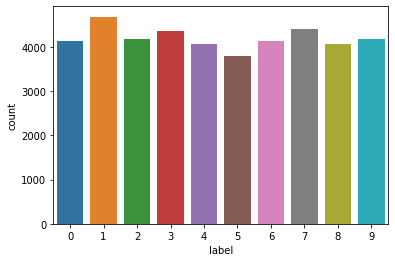

In [9]:
sns.countplot(train_data["label"])  #visualising count 

In [10]:
round(train_data.drop('label', axis=1).mean(), 2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

In [11]:
X = train_data.drop(columns = 'label') # dropping label feature which we are going to predict 
y = train_data['label']


In [12]:
X.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X = X/255.0   # normalization
test_data = test_data/255.0

In [14]:
from sklearn.preprocessing import scale
X1 = scale(X)      # feature scaling

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, train_size = 0.2 ,random_state = 2)

In [16]:
# linear model

linear_model = SVC(kernel='linear')
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

In [35]:
print("accuracy of the linear model is", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy of the linear model is 0.9477777777777778
[[1205    0    4    0    1    4   13    4    3    0]
 [   0 1415    8    6    1    2    1    6    6    0]
 [   7    2 1187   10   13    0    7   15    8    3]
 [   2    0   23 1215    2   27    0   19   14    7]
 [   4    3   11    0 1207    3    7    7    3   12]
 [   1    1    4   27    6 1056   12   10   11    5]
 [   8    1    9    1    5    5 1174    8    4    0]
 [   1    6   18    8    1    1    0 1261    2   18]
 [   5    9   18   18    2   13    8    7 1104    4]
 [   7    6    8   10   37    6    0   53    6 1118]]


In [18]:
# Nonlinear model

nonlinear_model = SVC(kernel='rbf')
nonlinear_model.fit(X_train, y_train)
y_pred = nonlinear_model.predict(X_test)

In [36]:
print("accuracy of the non-linear model is ", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy of the non-linear model is  0.9477777777777778
[[1205    0    4    0    1    4   13    4    3    0]
 [   0 1415    8    6    1    2    1    6    6    0]
 [   7    2 1187   10   13    0    7   15    8    3]
 [   2    0   23 1215    2   27    0   19   14    7]
 [   4    3   11    0 1207    3    7    7    3   12]
 [   1    1    4   27    6 1056   12   10   11    5]
 [   8    1    9    1    5    5 1174    8    4    0]
 [   1    6   18    8    1    1    0 1261    2   18]
 [   5    9   18   18    2   13    8    7 1104    4]
 [   7    6    8   10   37    6    0   53    6 1118]]


### Hyperparameter Tuning


In [20]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 2)  #5 fold cross validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],'C': [5,10]}]


In [21]:
model = SVC(kernel="rbf")
model_cv = GridSearchCV(estimator = model, param_grid = hyper_params, scoring= 'accuracy', cv = k_fold, verbose = 1,return_train_score=True)      
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [22]:
cv = pd.DataFrame(model_cv.cv_results_)
cv

       

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,28.842022,2.733698,6.879857,0.136628,5,0.01,"{'C': 5, 'gamma': 0.01}",0.761905,0.759524,0.761310,...,0.759048,0.002480,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,6.110857,0.305410,3.551507,0.161152,5,0.001,"{'C': 5, 'gamma': 0.001}",0.941667,0.944643,0.945238,...,0.941548,0.003159,2,0.995982,0.995685,0.995833,0.996280,0.996577,0.996071,0.000321
2,5.661629,0.275783,3.636416,0.146281,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.917262,0.928571,0.925000,...,0.922381,0.004464,4,0.948958,0.946429,0.947768,0.948214,0.950298,0.948333,0.001281
3,28.256183,0.921524,6.683022,0.121969,10,0.01,"{'C': 10, 'gamma': 0.01}",0.761905,0.759524,0.761310,...,0.759048,0.002480,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,5.827981,0.141268,3.403267,0.144151,10,0.001,"{'C': 10, 'gamma': 0.001}",0.944643,0.945833,0.944643,...,0.942738,0.003225,1,0.998810,0.998810,0.998661,0.998958,0.999405,0.998929,0.000256
5,4.588078,0.271906,3.104644,0.065323,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.924405,0.935714,0.929762,...,0.927619,0.004888,3,0.959375,0.959673,0.958929,0.959375,0.960268,0.959524,0.000441


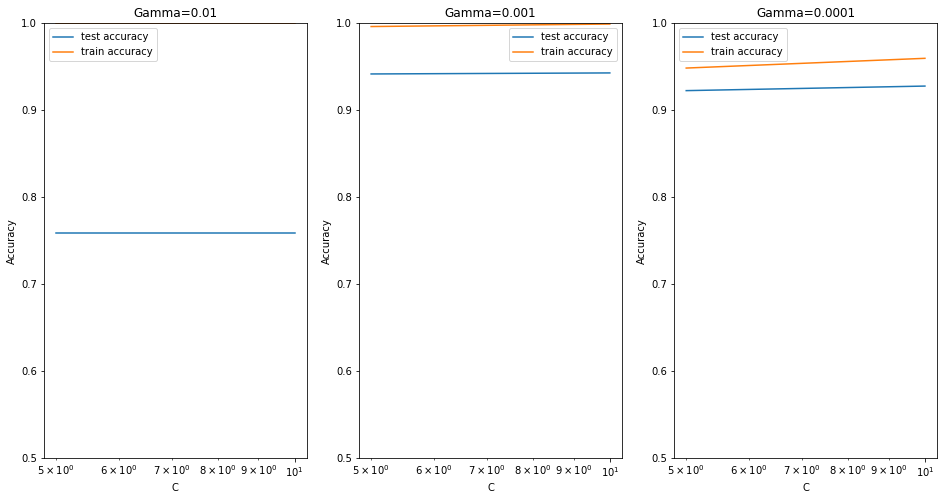

In [40]:

cv['param_C'] = cv['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,8))

# subplot 1
plt.subplot(131)
gamma1 = cv[cv['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.50, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2
plt.subplot(132)
gamma2 = cv[cv['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.50, 1])
plt.legend(['test accuracy', 'train accuracy'])
plt.xscale('log')


# subplot 3
plt.subplot(133)
gamma3 = cv[cv['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.50, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [24]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

In [25]:
model = SVC(C=10, gamma=0.001, kernel="rbf") # from the graph the best fit is for C= 10 and gamma = 0.001

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
print("Best accuracy of the model is ", metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Best accuracy of the model is  0.9477777777777778
[[1205    0    4    0    1    4   13    4    3    0]
 [   0 1415    8    6    1    2    1    6    6    0]
 [   7    2 1187   10   13    0    7   15    8    3]
 [   2    0   23 1215    2   27    0   19   14    7]
 [   4    3   11    0 1207    3    7    7    3   12]
 [   1    1    4   27    6 1056   12   10   11    5]
 [   8    1    9    1    5    5 1174    8    4    0]
 [   1    6   18    8    1    1    0 1261    2   18]
 [   5    9   18   18    2   13    8    7 1104    4]
 [   7    6    8   10   37    6    0   53    6 1118]]
